Use Case 9
==========

Problem Definition:
-------------------

    A climate scientist wishes to analyse potential correlations between Aerosol and Cloud ECVs.
    
Required Toolbox Features:
--------------------------

    * Access to and ingestion of ESA CCI Aerosol and Cloud data (Aerosol Optical Depth and Cloud Fraction)
    * Geometric adjustments
    * Spatial (point, polygon) and temporal subsetting
    * Visualisation of both times series at the same time: e.g. time series plot, time series animation
    * Correlation analysis, scatter-plot of correlation statistics, saving of image and correlation statistics on disk (format options)

Ingest data and create datasets
-------------------------------

In [1]:
from ect.core.io import DATA_STORE_REGISTRY
from ect.core.monitor import ConsoleMonitor
import ect.ops

data_store = DATA_STORE_REGISTRY.get_data_store('default')
data_store

FileSetFileStore('/home/ccitbx/.ect/data_stores/esa_cci_portal_ftp')

In [2]:
data_source_aerosol = data_store.query('AEROSOL_AATSR_SU_L3_V4.21_MONTHLY')
data_source_clouds = data_store.query('CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0')

Retrieve data by synchronizing with the ftp server

In [3]:
monitor = ConsoleMonitor()
data_source_aerosol[0].sync(('2007-01-01','2009-01-01'), monitor)

Synchronising AEROSOL_AATSR_SU_L3_V4.21_MONTHLY: started
Synchronising aerosol/data/AATSR_SU/L3/v4.21/MONTHLY/2007, contains 12 file(s), total size 70.9 MiB
Synchronising AEROSOL_AATSR_SU_L3_V4.21_MONTHLY:   0% aerosol/data/AATSR_SU/L3/v4.21/MONTHLY/2007
200701-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200702-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200703-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200704-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200705-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200706-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200707-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT-SU_MONTHLY-v4.21.nc: local file is up-to-date
200708-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR_ENVISAT

In [4]:
data_source_clouds[0].sync(('2007-01-01','2009-01-01'), monitor)

Synchronising CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0: started
Synchronising cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/01, contains 1 file(s), total size 160.2 MiB
Synchronising CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0:   0% cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/01
200701-ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-16-fv1.0.nc: local file is up-to-date
Synchronising CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0:   4% cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/01
Synchronising cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/02, contains 1 file(s), total size 160.2 MiB
Synchronising CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0:   4% cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/02
200702-ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-16-fv1.0.nc: local file is up-to-date
Synchronising CLOUD_L3C_AVHRR_NOAA-16_PHASE1_V1.0:   8% cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/02
Synchronising cloud/data/L3C/avhrr_noaa-16/phase1_v1.0/2007/03, contains 1 file(s), total size 160.2 MiB
Synchronising CLOUD_L3C_AVHRR_NOAA

In [5]:
time_range = tuple(['2008-01-01','2009-01-01'])
dataset_aerosol = data_source_aerosol[0].open_dataset(time_range)
dataset_clouds = data_source_clouds[0].open_dataset(time_range)

In [6]:
print(dataset_clouds._wrapped_dataset.dims)
print(dataset_aerosol._wrapped_dataset.dims)

Frozen(SortedKeysDict({'time': 13, 'lat': 360, 'lon': 720, 'hist_phase': 2, 'hist_ctp': 8, 'hist_ctp_bin': 7, 'hist_cot_bin': 6, 'hist_cot': 7}))
Frozen(SortedKeysDict({'longitude': 360, 'latitude': 180, 'time': 13}))


In [7]:
print(dataset_clouds.wrapped_dataset.data_vars)

Data variables:
    npoints_macro_cct_low_cloudy     (time, lat, lon) float64 0.0 0.0 0.0 ...
    cwp_med                          (time, lat, lon) float64 290.0 231.0 ...
    cwp                              (time, lat, lon) float64 430.0 460.5 ...
    ctp                              (time, lat, lon) float64 496.3 508.2 ...
    cc_total_uncertainty_std         (time, lat, lon) float64 0.0 0.0 0.0 ...
    ref_wm                           (time, lat, lon) float64 36.36 36.76 ...
    lwp_uncertainty_std              (time, lat, lon) float64 626.5 566.9 ...
    cth_wm                           (time, lat, lon) float64 4.999 4.778 ...
    cph                              (time, lat, lon) float64 0.625 0.5833 ...
    lwp_wstd                         (time, lat, lon) float64 71.81 60.03 ...
    cph_std                          (time, lat, lon) float64 0.4841 0.493 ...
    cth_uncertainty_std              (time, lat, lon) float64 4.832 8.825 ...
    iwp_wm                           (time, la

Filter datasets to select the desired variables
-----------------------------------------------

In [8]:
clouds_filter = tuple(['cc_total'])
aerosol_filter = tuple(['AOD550_mean'])

dataset_clouds = dataset_clouds.filter(clouds_filter)
dataset_aerosol = dataset_aerosol.filter(aerosol_filter)

In [9]:
print(dataset_clouds._wrapped_dataset.dims)
print(dataset_aerosol._wrapped_dataset.dims)

Frozen(SortedKeysDict({'lon': 720, 'time': 13, 'lat': 360}))
Frozen(SortedKeysDict({'longitude': 360, 'latitude': 180, 'time': 13}))


In [10]:
ect.ops.harmonize([dataset_clouds, dataset_aerosol])

In [11]:
print(dataset_clouds._wrapped_dataset.dims)
print(dataset_aerosol._wrapped_dataset.dims)

Frozen(SortedKeysDict({'lon': 720, 'time': 13, 'lat': 360}))
Frozen(SortedKeysDict({'lon': 360, 'time': 13, 'lat': 180}))


Plot the first time slice of the dataset

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


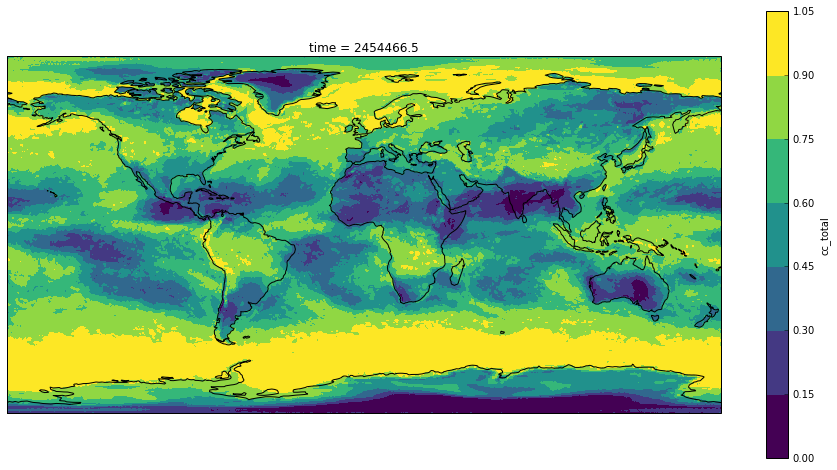

In [12]:
%matplotlib inline
ect.ops.plot_map(dataset_clouds, variable='cc_total', time=0, path='/home/ccitbx/Desktop/fig1.png')

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


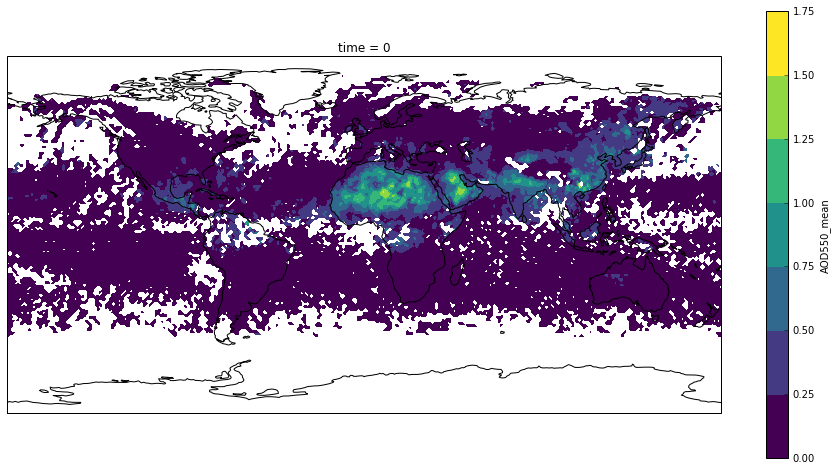

In [13]:
ect.ops.plot_map(dataset_aerosol, variable='AOD550_mean', time=0, path='/home/ccitbx/Desktop/fig2.png')

Co-register datasets by resampling
----------------------------------

In [14]:
dataset_aerosol = ect.ops.coregister(dataset_clouds, dataset_aerosol, 'bilinear')

In [15]:
print(dataset_clouds._wrapped_dataset.dims)
print(dataset_aerosol._wrapped_dataset.dims)

Frozen(SortedKeysDict({'lon': 720, 'time': 13, 'lat': 360}))
Frozen(SortedKeysDict({'time': 13, 'lon': 720, 'lat': 360}))


/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


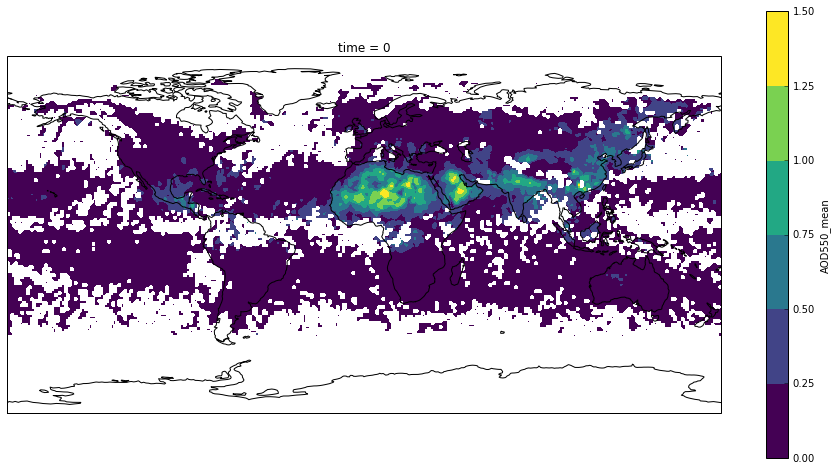

In [16]:
ect.ops.plot_map(dataset_aerosol, variable='AOD550_mean', time=0, path='/home/ccitbx/Desktop/fig3.png')

Select the desired spatial region
---------------------------------

In [17]:
dataset_aerosol = ect.ops.subset_spatial(dataset_aerosol, lat=[-40.,40.], lon=[-20.,60.])
dataset_clouds = ect.ops.subset_spatial(dataset_clouds, lat=[-40.,40.], lon=[-20.,60.])

In [18]:
print(dataset_clouds.wrapped_dataset.dims)
print(dataset_aerosol.wrapped_dataset.dims)

Frozen(SortedKeysDict({'lon': 160, 'time': 13, 'lat': 160}))
Frozen(SortedKeysDict({'time': 13, 'lon': 160, 'lat': 160}))


/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


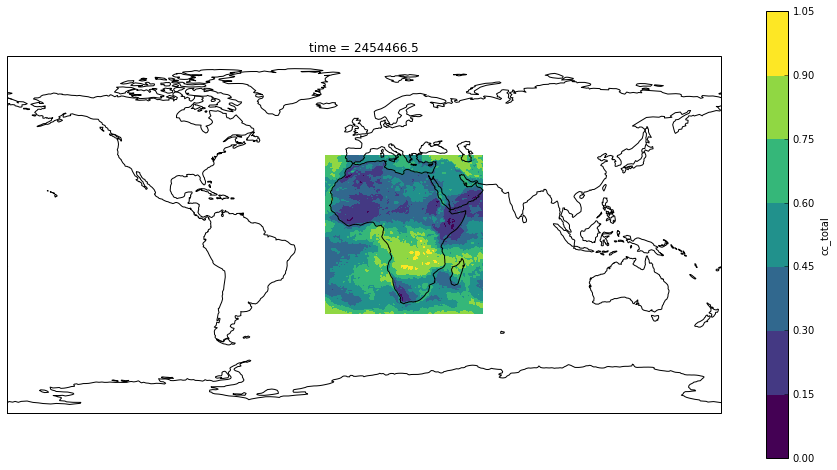

In [19]:
ect.ops.plot_map(dataset_clouds, variable='cc_total', time=0, path='/home/ccitbx/Desktop/fig4.png')

/home/ccitbx/miniconda3/envs/ect_env/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


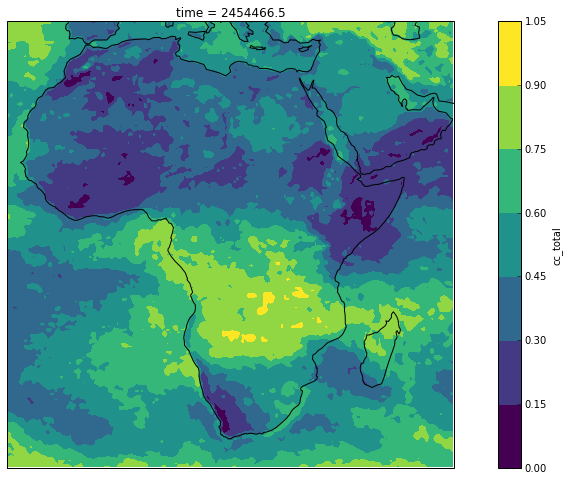

In [20]:
ect.ops.plot_map(dataset_clouds, variable='cc_total', time=0, 
                 extents=[-20., 60., -40., 40.], path='/home/ccitbx/Desktop/fig5.png')

Select the desired temporal region
----------------------------------

In [21]:
dataset_aerosol = ect.ops.subset_temporal_index(dataset_aerosol, time=[0,10])
dataset_clouds = ect.ops.subset_temporal_index(dataset_clouds, time=[0,10])

In [22]:
print(dataset_clouds._wrapped_dataset.dims)
print(dataset_aerosol._wrapped_dataset.dims)

Frozen(SortedKeysDict({'lon': 160, 'time': 10, 'lat': 160}))
Frozen(SortedKeysDict({'time': 10, 'lon': 160, 'lat': 160}))


In [23]:
print(dataset_clouds.wrapped_dataset.time)
print(dataset_aerosol.wrapped_dataset.time)

<xarray.DataArray 'time' (time: 10)>
array([ 2454466.5,  2454710.5,  2454497.5,  2454526.5,  2454648.5,
        2454618.5,  2454801.5,  2454832.5,  2454679.5,  2454587.5], dtype=float32)
Coordinates:
  * time     (time) float32 2.45447e+06 2.45471e+06 2.4545e+06 2.45453e+06 ...
Attributes:
    long_name: time in julian days
    calendar: julian
    units: day
    standard_name: time
<xarray.DataArray 'time' (time: 10)>
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9


Retrieve and plot timeseries
----------------------------

In [24]:
timeseries_aerosol_point = ect.ops.timeseries(dataset_aerosol, lat=50., lon=50.)
timeseries_clouds_point = ect.ops.timeseries(dataset_clouds, lat=50., lon=50.)
timeseries_aerosol_mean = ect.ops.timeseries_mean(dataset_aerosol)
timeseries_clouds_mean = ect.ops.timeseries_mean(dataset_clouds)

In [25]:
print(timeseries_aerosol_mean.wrapped_dataset)
print(timeseries_clouds_mean.wrapped_dataset)

<xarray.Dataset>
Dimensions:      (time: 10)
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    AOD550_mean  (time) float64 0.273 0.3157 0.1756 0.1904 0.2992 0.326 ...
<xarray.Dataset>
Dimensions:   (time: 10)
Coordinates:
  * time      (time) float32 2.45447e+06 2.45471e+06 2.4545e+06 2.45453e+06 ...
Data variables:
    cc_total  (time) float64 0.4997 0.4357 0.4369 0.4257 0.4045 0.3881 ...


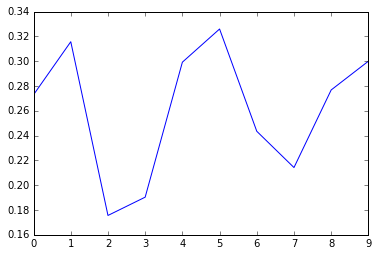

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(timeseries_aerosol_mean.wrapped_dataset['AOD550_mean'].data)

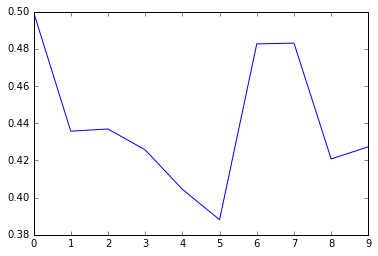

In [27]:
plt.plot(timeseries_clouds_mean.wrapped_dataset['cc_total'].data)

Do correlation analysis
-----------------------

In [29]:
correlation = ect.ops.pearson_correlation(timeseries_clouds_mean, timeseries_aerosol_mean, path="/home/ccitbx/Desktop/a.txt")
correlation

{'correlation_coefficient': <xarray.DataArray ()>
 array(-0.002992340530618548), 'test_value': <xarray.DataArray ()>
 array(-0.008463655015578253)}

Create a scatter plot
---------------------------------